In [1]:
import numpy as np
from sklearn.mixture import GaussianMixture
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
from google.colab import files
uploaded = files.upload()

Saving GMM_EM.csv to GMM_EM (1).csv


In [3]:
import io
#Load data as pandas
df = pd.read_csv(io.BytesIO(uploaded['GMM_EM.csv']))
#Pandas type -> numpy
x=df.to_numpy()
## Remove empty(NaN) rows in dataset
x=x[~np.isnan(x).any(axis=1)]
er = x[:,0]
df=df.dropna()

In [4]:
##Data example
#print(df.head())
#print(x)

In [5]:
##Histogram based on 'Er' dataset
#plt.hist(er, bins= 50, alpha=0.6)
hist, bin_edge=np.histogram(er, bins=50)

In [6]:
#Reshape the data for GMM model (parameter requries 2D array)
er=er.reshape(-1,1)

In [7]:
#BIC(Bayesian Information Criterion)-Confim the optimal number of component
bics=[]
min_bic=0
_count=1
for i in range(1,11):
  _gmm = GaussianMixture(n_components=i,max_iter=1000, random_state=0)
  labels = _gmm.fit(er).predict(er)
  bic= _gmm.bic(er)
  bics.append(bic)
  if bic < min_bic or min_bic == 0:
    min_bic = bic
    opt_bic = i

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Opt. components = 3')

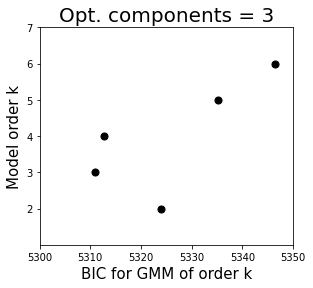

In [8]:
fig = plt.figure(figsize=(10, 4))
ax = fig.add_subplot(1,2,1)
# Plot (f) in reference
plt.scatter(bics,np.arange(1,11), alpha=1, c='black', s= 50)
plt.legend(frameon=False, fontsize=15)
plt.xlabel('BIC for GMM of order k', fontsize=15)
plt.ylabel('Model order k', fontsize=15)
plt.yticks(np.arange(2,10, 1))
plt.xticks(np.arange(5300,5400, 10))
#X,Y range to demonstrate in plot
plt.ylim([1, 7])
plt.xlim([5300,5350]) 
plt.title('Opt. components = '+str(opt_bic), fontsize=20)

In [9]:
##Parameters
#component =1;
#covariance ={'full','tied','diag','spherical'}
#tol = 1e-3
component= opt_bic
#Create GMM model
GMM = GaussianMixture(n_components=opt_bic, random_state=10)

In [10]:
#Parameters
means = GMM.fit(er).means_  
covars  = GMM.fit(er).covariances_
weights = GMM.fit(er).weights_

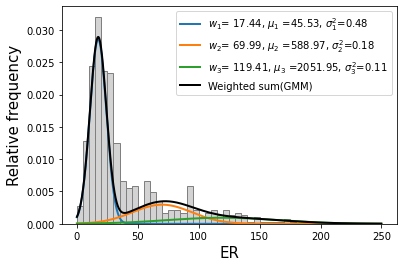

In [27]:
# k= 3
x_axis = np.arange(0, 250, 0.1)
y_axis0 = norm.pdf(x_axis, float(means[0][0]), np.sqrt(float(covars[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(means[1][0]), np.sqrt(float(covars[1][0][0])))*weights[1] # 2nd gaussian
y_axis2 = norm.pdf(x_axis, float(means[2][0]), np.sqrt(float(covars[2][0][0])))*weights[2] # 3rd gaussian

#basic histogram
#plt.hist(er, density=True, color='black', bins=np.arange(-100, 100, 1))
plt.hist(er, density=True, color='lightgray', bins=np.arange(0, 200, 5), histtype='bar',edgecolor = 'gray')

plt.plot(x_axis, y_axis0, lw=2, c='C0', label ='$w_1$= {}, $\mu_1$ ={}, $\sigma^2_1$={}'.format
         (round(means[0][0],2),round(covars[0][0][0],2),round(weights[0],2)))
plt.plot(x_axis, y_axis1, lw=2, c='C1', label ='$w_2$= {}, $\mu_2$ ={}, $\sigma^2_2$={}'.format
         (round(means[1][0],2),round(covars[1][0][0],2),round(weights[1],2)))
plt.plot(x_axis, y_axis2, lw=2, c='C2', label ='$w_3$= {}, $\mu_3$ ={}, $\sigma^2_3$={}'.format
         (round(means[2][0],2),round(covars[2][0][0],2),round(weights[2],2)))
#Weight sum
plt.plot(x_axis, y_axis0+y_axis1+y_axis2, lw=2, c='black', label = 'Weighted sum(GMM)')
#Legends
plt.ylabel('Relative frequency', fontsize=15)
plt.xlabel('ER', fontsize=15)
plt.legend(fontsize=10)

In [12]:
#K=4
GMM = GaussianMixture(n_components=4, random_state=10)

In [13]:
#Parameters
means = GMM.fit(er).means_  
covars  = GMM.fit(er).covariances_
weights = GMM.fit(er).weights_

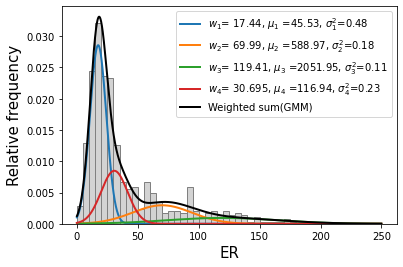

In [28]:
# k= 4
x_axis = np.arange(0, 250, 0.1)
y_axis0 = norm.pdf(x_axis, float(means[0][0]), np.sqrt(float(covars[0][0][0])))*weights[0] # 1st gaussian
y_axis1 = norm.pdf(x_axis, float(means[1][0]), np.sqrt(float(covars[1][0][0])))*weights[1] # 2nd gaussian
y_axis2 = norm.pdf(x_axis, float(means[2][0]), np.sqrt(float(covars[2][0][0])))*weights[2] # 3rd gaussian
y_axis3 = norm.pdf(x_axis, float(means[3][0]), np.sqrt(float(covars[3][0][0])))*weights[3] # 3rd gaussian

#basic histogram
#plt.hist(er, density=True, color='black', bins=np.arange(-100, 100, 1))
plt.hist(er, density=True, color='lightgray', bins=np.arange(0, 200, 5), histtype='bar',edgecolor = 'gray')

plt.plot(x_axis, y_axis0, lw=2, c='C0', label ='$w_1$= {}, $\mu_1$ ={}, $\sigma^2_1$={}'.format
         (round(means[0][0],2),round(covars[0][0][0],2),round(weights[0],2)))
plt.plot(x_axis, y_axis1, lw=2, c='C1', label ='$w_2$= {}, $\mu_2$ ={}, $\sigma^2_2$={}'.format
         (round(means[1][0],2),round(covars[1][0][0],2),round(weights[1],2)))
plt.plot(x_axis, y_axis2, lw=2, c='C2', label ='$w_3$= {}, $\mu_3$ ={}, $\sigma^2_3$={}'.format
         (round(means[2][0],2),round(covars[2][0][0],2),round(weights[2],2)))
plt.plot(x_axis, y_axis3, lw=2, c='C3', label ='$w_4$= {}, $\mu_4$ ={}, $\sigma^2_4$={}'.format
         (round(means[3][0],3),round(covars[3][0][0],2),round(weights[3],2)))
#Weight sum
plt.plot(x_axis, y_axis0+y_axis1+y_axis2+y_axis3, lw=2, c='black', label = 'Weighted sum(GMM)')
#Legends
plt.ylabel('Relative frequency', fontsize=15)
plt.xlabel('ER', fontsize=15)
plt.legend(fontsize=10)

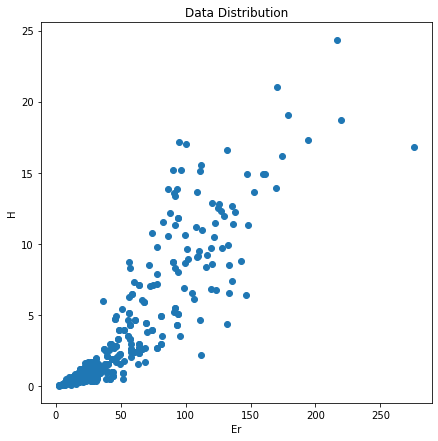

In [15]:
plt.figure(figsize=(7,7))
plt.scatter(df['Er'],df['H'])
plt.xlabel('Er')
plt.ylabel('H')
plt.title('Data Distribution')
plt.show()